# Initial exploratory analysis of the transaction data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

Reading in the data columns as dates

In [3]:
transactions_train_og = pd.read_csv('./data/transactions_train.csv', parse_dates=["TX_TS","CARD_EXPIRY_DATE"])
transactions_train_og = transactions_train_og.set_index("TX_ID")

C:\Users\joshu\AppData\Local\Temp\ipykernel_3440\3419703444.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions_train_og = pd.read_csv('./data/transactions_train.csv', parse_dates=["TX_TS","CARD_EXPIRY_DATE"])


In [4]:
transactions_train_og.index.is_unique

True

## Only the fraud column

In [5]:
t_train_fraud = transactions_train_og[['TX_FRAUD']]

In [6]:
t_train_fraud.head()

,TX_FRAUD
TX_ID,
c6dde46458f3d1cfeb9256f8add45a14fb349f8f,0
ddd7cafa71ee84f3b46498fb6aa9f92450116719,0
fe42708ae41a8f25259b96c25e2d6067568c224c,0
c3c6ffdc73d71f35c0da72032420e15289e4d073,0
ced166cbbafcf3dc10fa369472253c986b12b6f8,0


In [7]:
t_train_fraud.describe()

,TX_FRAUD
count,1.066440e+06
mean,2.584674e-02
std,1.586780e-01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.000000e+00


In [8]:
t_train_fraud.size

1066440

In [9]:
t_train_fraud.isna().sum()

TX_FRAUD    0
dtype: int64

In [10]:
num_fraudalent = (t_train_fraud['TX_FRAUD']==1).sum()
num_authentic = t_train_fraud.size - num_fraudalent
print(num_fraudalent,num_authentic)

27564 1038876


Text(0, 0.5, 'Count')

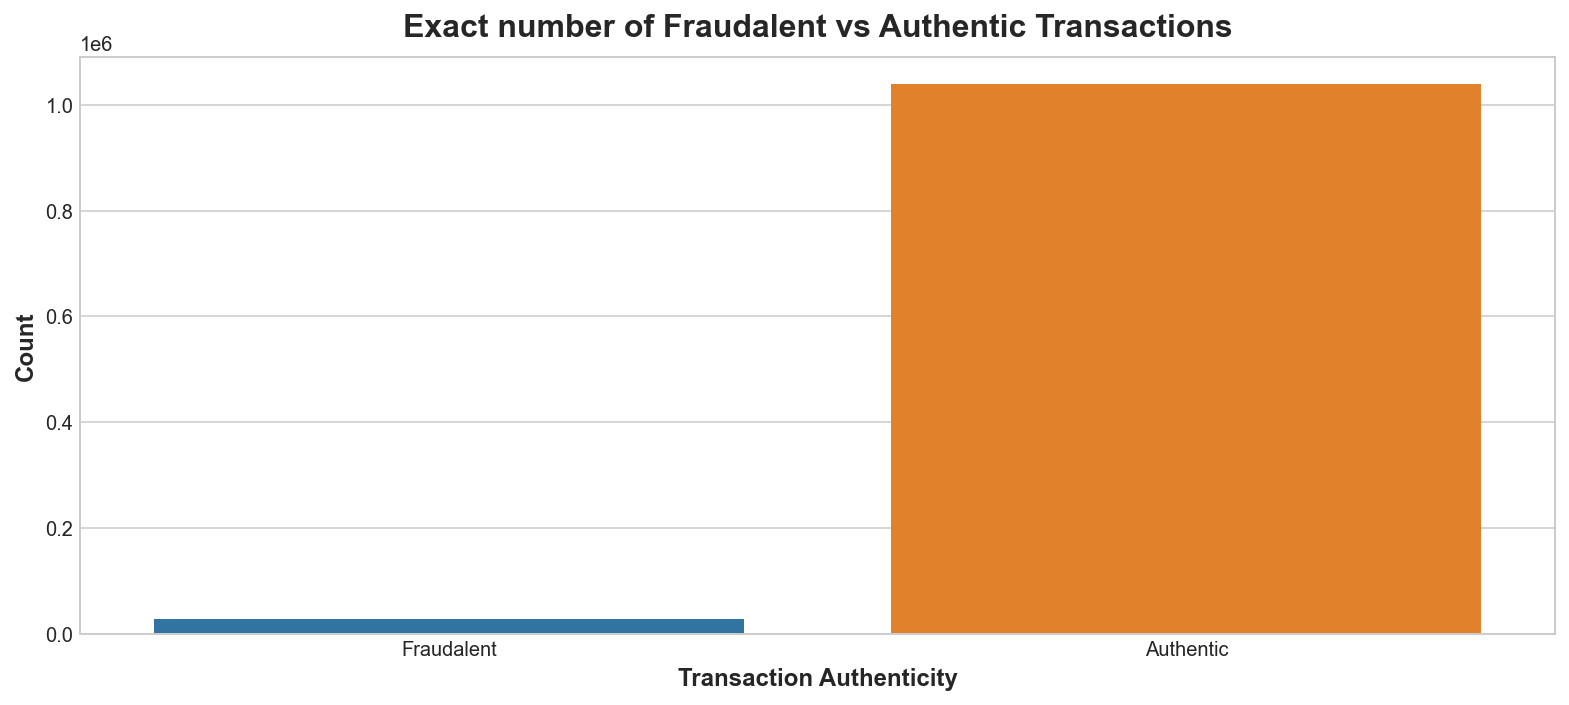

In [11]:
sns.barplot(x = ['Fraudalent','Authentic'], y =[num_fraudalent,num_authentic])
plt.title('Exact number of Fraudalent vs Authentic Transactions')
plt.xlabel('Transaction Authenticity')
plt.ylabel('Count')


In [12]:
counts = t_train_fraud['TX_FRAUD'].value_counts()
counts

0    1038876
1      27564
Name: TX_FRAUD, dtype: int64

In [13]:
num_fraudalent_per = (t_train_fraud['TX_FRAUD']==1).sum()/t_train_fraud.size * 100
num_authentic_per = (t_train_fraud.size - num_fraudalent)/t_train_fraud.size * 100


In [14]:
print(num_fraudalent_per,num_authentic_per)

2.5846742432766963 97.4153257567233


Text(0, 0.5, 'Percentage')

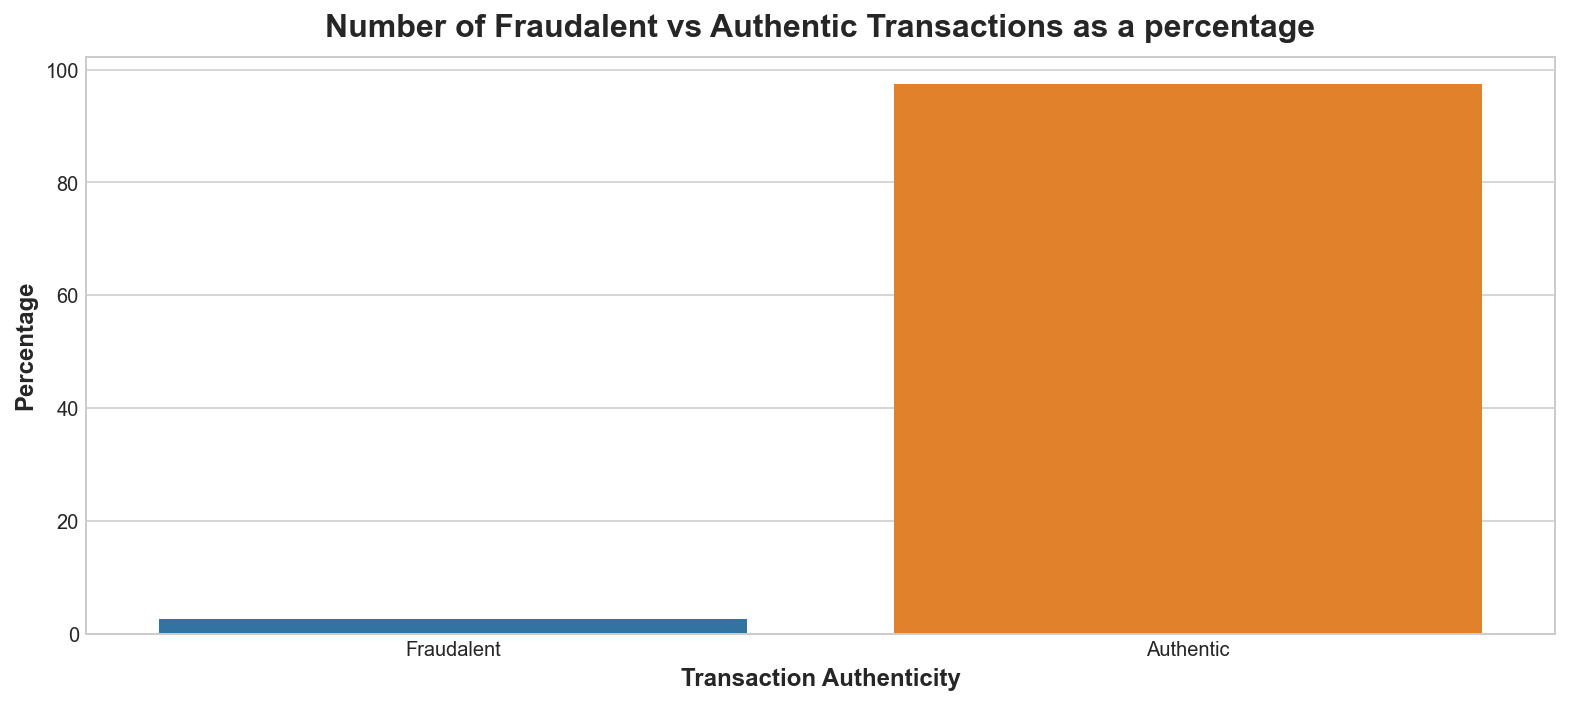

In [15]:
sns.barplot(x = ['Fraudalent','Authentic'], y =[num_fraudalent_per,num_authentic_per])
plt.title('Number of Fraudalent vs Authentic Transactions as a percentage')
plt.xlabel('Transaction Authenticity')
plt.ylabel('Percentage')


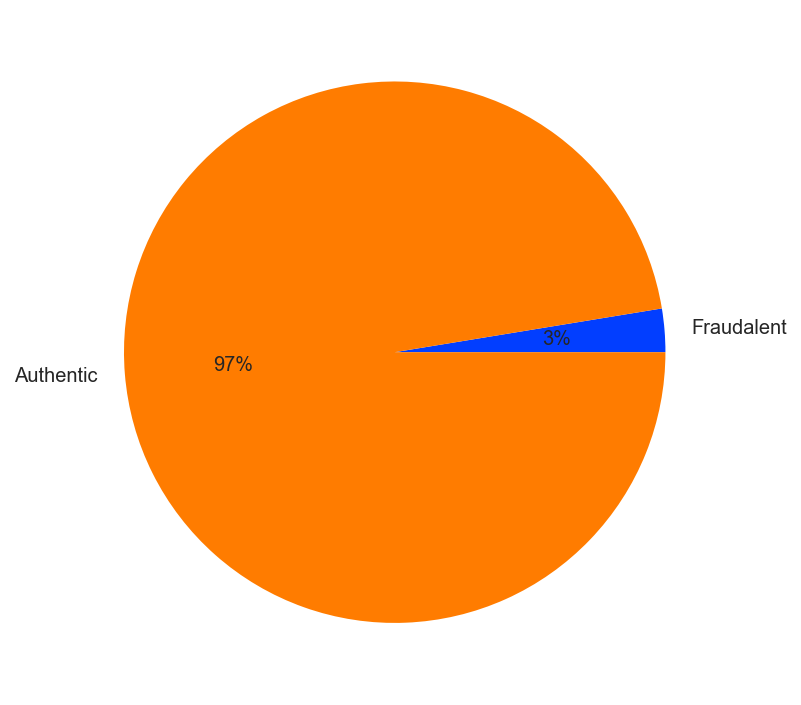

In [16]:
plt.pie(x = [num_fraudalent_per,num_authentic_per],labels = ['Fraudalent','Authentic'] ,colors = sns.color_palette('bright'), autopct='%.0f%%')
plt.show()

### Looking at all the columns here

In [17]:
transactions_train_og.dtypes

TX_TS                                    datetime64[ns, UTC]
CUSTOMER_ID                                            int64
TERMINAL_ID                                            int64
TX_AMOUNT                                            float64
TX_FRAUD                                               int64
TRANSACTION_GOODS_AND_SERVICES_AMOUNT                float64
TRANSACTION_CASHBACK_AMOUNT                          float64
CARD_EXPIRY_DATE                                      object
CARD_DATA                                             object
CARD_BRAND                                            object
TRANSACTION_TYPE                                      object
TRANSACTION_STATUS                                    object
FAILURE_CODE                                          object
FAILURE_REASON                                        object
TRANSACTION_CURRENCY                                  object
CARD_COUNTRY_CODE                                     object
MERCHANT_ID             

In [21]:
transactions_train_og.head()

,TX_TS,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TRANSACTION_GOODS_AND_SERVICES_AMOUNT,TRANSACTION_CASHBACK_AMOUNT,CARD_EXPIRY_DATE,CARD_DATA,CARD_BRAND,TRANSACTION_TYPE,TRANSACTION_STATUS,FAILURE_CODE,FAILURE_REASON,TRANSACTION_CURRENCY,CARD_COUNTRY_CODE,MERCHANT_ID,IS_RECURRING_TRANSACTION,ACQUIRER_ID,CARDHOLDER_AUTH_METHOD
TX_ID,,,,,,,,,,,,,,,,,,,,
c6dde46458f3d1cfeb9256f8add45a14fb349f8f,2021-04-02 12:42:24+00:00,7323088226725338,55875360,0.00,0,0.00,0.0,12/22,5428********818,MasterCard,Purchase,Settled,NaN,NaN,USD,SA,136def43-2ef3-4bc9-a8c2-60598c316e9c,False,ACQ1,Online PIN
ddd7cafa71ee84f3b46498fb6aa9f92450116719,2021-02-06 15:16:01+00:00,8627200351202456,31418810,1.14,0,1.14,0.0,06/22,4024********909,Visa,Purchase,Settled,NaN,NaN,USD,CA,a019e1d4-a3b3-479e-9747-a2ece27ff980,False,ACQ2,Signature
fe42708ae41a8f25259b96c25e2d6067568c224c,2021-05-15 08:10:51+00:00,8983139483148479,84302882,0.46,0,0.46,0.0,07/23,5428********996,MasterCard,Purchase,Settled,NaN,NaN,USD,CA,f15d1eca-36f0-4f11-b17d-fe36475b021e,False,ACQ1,Online PIN
c3c6ffdc73d71f35c0da72032420e15289e4d073,2021-02-02 11:12:29+00:00,2016744441942099,26364082,2.06,0,2.06,0.0,02/22,5337********869,MasterCard,Purchase,Settled,NaN,NaN,GBP,US,7bd1dea7-72fa-41b3-8232-b315e1187b58,False,ACQ2,Offline plaintext PIN
ced166cbbafcf3dc10fa369472253c986b12b6f8,2021-01-07 00:17:46+00:00,6888146658050582,34582161,1.50,0,1.50,0.0,05/22,5428********562,MasterCard,Purchase,Settled,NaN,NaN,USD,BE,eee6cb9f-b64d-4710-8c36-1c2b426d7466,False,ACQ2,Offline plaintext PIN


In [32]:
transactions_train_og[transactions_train_og['TRANSACTION_CASHBACK_AMOUNT'] > 0]

,TX_TS,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_FRAUD,TRANSACTION_GOODS_AND_SERVICES_AMOUNT,TRANSACTION_CASHBACK_AMOUNT,CARD_EXPIRY_DATE,CARD_DATA,CARD_BRAND,TRANSACTION_TYPE,TRANSACTION_STATUS,FAILURE_CODE,FAILURE_REASON,TRANSACTION_CURRENCY,CARD_COUNTRY_CODE,MERCHANT_ID,IS_RECURRING_TRANSACTION,ACQUIRER_ID,CARDHOLDER_AUTH_METHOD
TX_ID,,,,,,,,,,,,,,,,,,,,
52d522b586d9564846a1fdcaae67b62be2349fe7,2021-09-10 18:37:51+00:00,9844756182206766,7346221,49.04,0,41.19,7.85,01/22,5551********478,MasterCard,Purchase with cashback,Settled,NaN,NaN,AED,US,e5bdf532-31fb-44a4-98dd-2fb4efdf569e,False,ACQ1,Online PIN
5ce243c97a6f889a4affae668151e9bfd7987a0a,2021-09-03 00:34:41+00:00,2173245803065882,27289146,33.70,0,32.02,1.68,09/22,4485********935,Visa,Purchase with cashback,Settled,NaN,NaN,AED,US,440655e2-cd04-4a88-8e56-a207b91eb407,False,ACQ2,Online PIN
572dfee67a0e904b46690c76c77fe7fa1f705e17,2021-03-08 17:48:52+00:00,1766985706387605,35249386,86.04,0,78.30,7.74,04/23,4916********801,Visa,Purchase with cashback,Settled,NaN,NaN,AED,US,36029ee8-e15b-48b0-bf5f-f0f285933c2d,False,ACQ3,Online PIN
a08ed3e76c98878c868179b63ef883d810ee4bda,2021-04-17 12:59:20+00:00,4854367364138992,11585191,37.12,0,30.44,6.68,12/22,4916********595,Visa,Purchase with cashback,Settled,NaN,NaN,AED,US,024d9d68-6f27-47cd-b194-698bb3baa723,False,ACQ2,Offline plaintext PIN
27716469bb67e22b2df714a9beb2d71d39fd9e4e,2021-06-20 21:10:16+00:00,1476640567603114,34383031,37.32,0,35.83,1.49,02/23,5344********765,MasterCard,Purchase with cashback,Settled,NaN,NaN,AED,US,b1d105e6-264d-4035-8496-baa1dfb23eab,False,ACQ4,Offline plaintext PIN and signature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6f31f8d892ae82d35dfe8f0229e573ba4c4003ac,2021-09-14 07:21:08+00:00,911608502068788,59412034,6.20,0,5.21,0.99,02/22,5247********729,MasterCard,Purchase with cashback,Authorized,NaN,NaN,JPY,US,71b0b12c-719f-4afd-80fb-be0e6f895e13,True,ACQ3,Offline plaintext PIN
0d19c579c7b8047da7c0c97f0d805ac18509cff5,2021-11-08 10:47:38+00:00,6320459864973444,7141814,24.86,0,22.87,1.99,06/22,4916********568,Visa,Purchase with cashback,Settled,NaN,NaN,JPY,US,b2bb916f-d334-4e3b-b2c4-561a76a16e6f,False,ACQ2,Online PIN
942a9fa385a96e50c87c62457ac6877c3efba9a9,2021-09-03 22:28:10+00:00,2950904933942775,91714984,104.96,0,88.17,16.79,09/22,5344********784,MasterCard,Purchase with cashback,Settled,NaN,NaN,JPY,US,b66d984a-1a30-44e1-8c73-6152d506a844,False,ACQ4,No CVM performed


In [28]:
transactions_train_og['CARDHOLDER_AUTH_METHOD'].value_counts()

Online PIN                              404363
Offline plaintext PIN                   283531
No CVM performed                        102523
Offline enciphered PIN and signature     93790
Offline enciphered PIN                   87385
Offline plaintext PIN and signature      53923
Signature                                40924
Name: CARDHOLDER_AUTH_METHOD, dtype: int64

In [29]:
transactions_train_og.isnull().sum()

TX_TS                                          0
CUSTOMER_ID                                    0
TERMINAL_ID                                    0
TX_AMOUNT                                      0
TX_FRAUD                                       0
TRANSACTION_GOODS_AND_SERVICES_AMOUNT          0
TRANSACTION_CASHBACK_AMOUNT                    0
CARD_EXPIRY_DATE                               0
CARD_DATA                                      0
CARD_BRAND                                     0
TRANSACTION_TYPE                               0
TRANSACTION_STATUS                             0
FAILURE_CODE                             1049208
FAILURE_REASON                           1049208
TRANSACTION_CURRENCY                           0
CARD_COUNTRY_CODE                              0
MERCHANT_ID                                    0
IS_RECURRING_TRANSACTION                       0
ACQUIRER_ID                                    1
CARDHOLDER_AUTH_METHOD                         1
dtype: int64